<a href="https://colab.research.google.com/github/ZynTran/Yolo/blob/main/khaycom_bottlewater_chatbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ppduyn/tnh-tin-cm")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/tnh-tin-cm


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import kagglehub

# Cấu hình
image_size = 64
dishes_classes = ['Chicken', 'Egg', 'Fish', 'Fruit', 'Meat', 'Rice', 'Shrimp', 'Soup', 'Soya-cake', 'Vegetable']

# Tải dataset từ Kaggle
path = kagglehub.dataset_download("ppduyn/tnh-tin-cm")

data, labels = [], []

# Load ảnh từ thư mục
for i, dishes in enumerate(dishes_classes):
    folder = os.path.join(path, 'tính tiền cơm', dishes)
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            img = img / 255.0
            data.append(img)
            labels.append(i)
        except:
            continue

data = np.array(data)
labels = to_categorical(labels, num_classes=len(dishes_classes))

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Xây dựng mô hình CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(528, activation='relu'),
    Dense(128, activation='relu'),
    Dense(len(dishes_classes), activation='softmax')
])

# Compile và huấn luyện
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, batch_size=10, validation_data=(X_test, y_test))

# Lưu mô hình
model.save('model.h5')
print("✅ Đã lưu model thành công!")


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 0.0819 - loss: 2.4240 - val_accuracy: 0.2000 - val_loss: 2.1295
Epoch 2/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.3155 - loss: 1.9201 - val_accuracy: 0.2167 - val_loss: 2.0222
Epoch 3/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.4478 - loss: 1.5940 - val_accuracy: 0.3333 - val_loss: 1.8416
Epoch 4/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.4420 - loss: 1.4853 - val_accuracy: 0.3333 - val_loss: 1.8406
Epoch 5/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.5917 - loss: 1.0868 - val_accuracy: 0.2500 - val_loss: 2.2596
Epoch 6/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.7432 - loss: 0.7136 - val_accuracy: 0.3833 - val_loss: 2.2362
Epoch 7/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.9254 - loss: 0.3552 - val_accuracy: 0.2833 - val_loss: 2.8789
Epoch 8/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - accuracy: 0.8832 - loss: 0.3833 - val_accuracy: 0.3333 - val_

✅ Đã lưu model thành công!



0: 640x640 3 bowls, 5570.5ms
Speed: 6.6ms preprocess, 5570.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
🧾 Tổng tiền: 13,000 VND


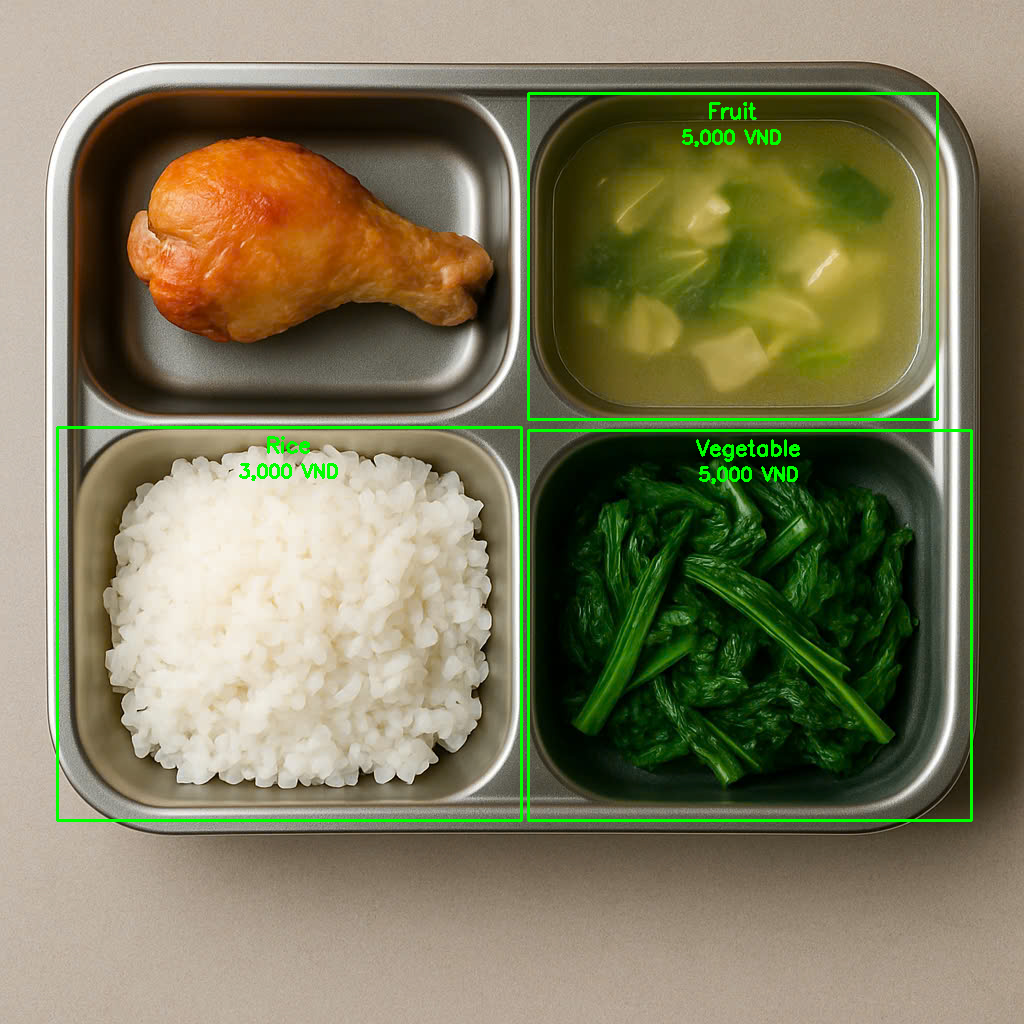

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
IMG_PATH = "/content/khay2.jpg"
YOLO_MODEL_PATH = "/content/yolov8x.pt"
CLF_MODEL_PATH = "/content/model.h5"
yolo_model = YOLO(YOLO_MODEL_PATH)
clf_model = load_model(CLF_MODEL_PATH)
dishes_classes = ['Chicken', 'Egg', 'Fish', 'Fruit', 'Meat', 'Rice', 'Shrimp', 'Soup', 'Soya-cake', 'Vegetable']
PRICE_TABLE = {
    'Rice': 3000,
    'Chicken': 15000,
    'Fish': 15000,
    'Egg': 5000,
    'Meat': 15000,
    'Shrimp': 15000,
    'Soup': 5000,
    'Vegetable': 5000,
    'Fruit': 5000,
    'Soya-cake': 3000
}
def classify_crop(img_crop):
    if img_crop is None or img_crop.shape[0] == 0 or img_crop.shape[1] == 0:
        return "Unknown", 0.0
    try:
        img = cv2.resize(img_crop, (64, 64))
        img = img.astype('float32') / 255.0
        x = img.reshape(1, 64, 64, 3)
        preds = clf_model.predict(x, verbose=0)
        idx = np.argmax(preds)
        conf = float(np.max(preds))
        return dishes_classes[idx], conf
    except:
        return "Error", 0.0
img = cv2.imread(IMG_PATH)
if img is None:
    print("Không đọc được ảnh.")
else:
    img_draw = img.copy()
    total_price = 0

    results = yolo_model(img)[0]
    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        crop = img[y1:y2, x1:x2]
        label, conf = classify_crop(crop)
        price = PRICE_TABLE.get(label, 0)
        if label not in ["Unknown", "Error"] and conf >= 0.5:
            total_price += price
            color = (0, 255, 0)
        else:
            color = (0, 0, 255)
        cv2.rectangle(img_draw, (x1, y1), (x2, y2), color, 2)
        if label != "Unknown":
            text_label = f"{label}"
            text_price = f"{price:,} VND"
            label_size = cv2.getTextSize(text_label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)[0]
            price_size = cv2.getTextSize(text_price, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)[0]

            label_x = x1 + (x2 - x1 - label_size[0]) // 2
            price_x = x1 + (x2 - x1 - price_size[0]) // 2
            text_y = y1 + 25
            price_y = text_y + 25
            cv2.putText(img_draw, text_label, (label_x, text_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
            cv2.putText(img_draw, text_price, (price_x, price_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    print(f"🧾 Tổng tiền: {total_price:,} VND")
    cv2_imshow(img_draw)


0: 640x640 4 bowls, 1 orange, 4429.3ms
Speed: 5.5ms preprocess, 4429.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
🧾 Tổng tiền: 43,000 VND


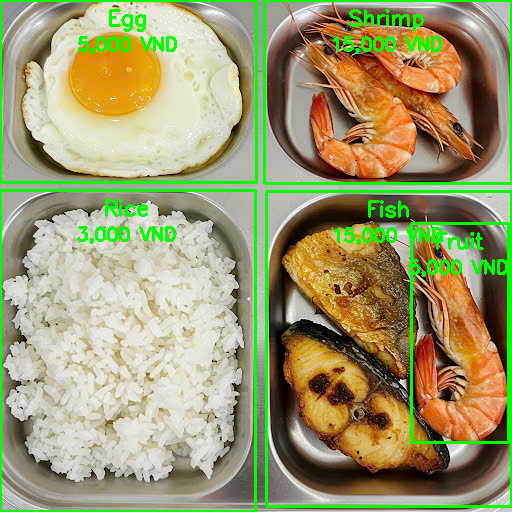

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
IMG_PATH = "/content/khay3.jpg"
YOLO_MODEL_PATH = "/content/yolov8x.pt"
CLF_MODEL_PATH = "/content/model.h5"
yolo_model = YOLO(YOLO_MODEL_PATH)
clf_model = load_model(CLF_MODEL_PATH)
dishes_classes = ['Chicken', 'Egg', 'Fish', 'Fruit', 'Meat', 'Rice', 'Shrimp', 'Soup', 'Soya-cake', 'Vegetable']
PRICE_TABLE = {
    'Rice': 3000,
    'Chicken': 15000,
    'Fish': 15000,
    'Egg': 5000,
    'Meat': 15000,
    'Shrimp': 15000,
    'Soup': 5000,
    'Vegetable': 5000,
    'Fruit': 5000,
    'Soya-cake': 3000
}
def classify_crop(img_crop):
    if img_crop is None or img_crop.shape[0] == 0 or img_crop.shape[1] == 0:
        return "Unknown", 0.0
    try:
        img = cv2.resize(img_crop, (64, 64))
        img = img.astype('float32') / 255.0
        x = img.reshape(1, 64, 64, 3)
        preds = clf_model.predict(x, verbose=0)
        idx = np.argmax(preds)
        conf = float(np.max(preds))
        return dishes_classes[idx], conf
    except:
        return "Error", 0.0
img = cv2.imread(IMG_PATH)
if img is None:
    print("Không đọc được ảnh.")
else:
    img_draw = img.copy()
    total_price = 0

    results = yolo_model(img)[0]
    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        crop = img[y1:y2, x1:x2]
        label, conf = classify_crop(crop)
        price = PRICE_TABLE.get(label, 0)
        if label not in ["Unknown", "Error"] and conf >= 0.5:
            total_price += price
            color = (0, 255, 0)
        else:
            color = (0, 0, 255)
        cv2.rectangle(img_draw, (x1, y1), (x2, y2), color, 2)
        if label != "Unknown":
            text_label = f"{label}"
            text_price = f"{price:,} VND"
            label_size = cv2.getTextSize(text_label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)[0]
            price_size = cv2.getTextSize(text_price, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)[0]

            label_x = x1 + (x2 - x1 - label_size[0]) // 2
            price_x = x1 + (x2 - x1 - price_size[0]) // 2
            text_y = y1 + 25
            price_y = text_y + 25
            cv2.putText(img_draw, text_label, (label_x, text_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
            cv2.putText(img_draw, text_price, (price_x, price_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    print(f"🧾 Tổng tiền: {total_price:,} VND")
    cv2_imshow(img_draw)


0: 640x640 4 bowls, 5134.8ms
Speed: 9.0ms preprocess, 5134.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
🧾 Tổng tiền: 28,000 VND


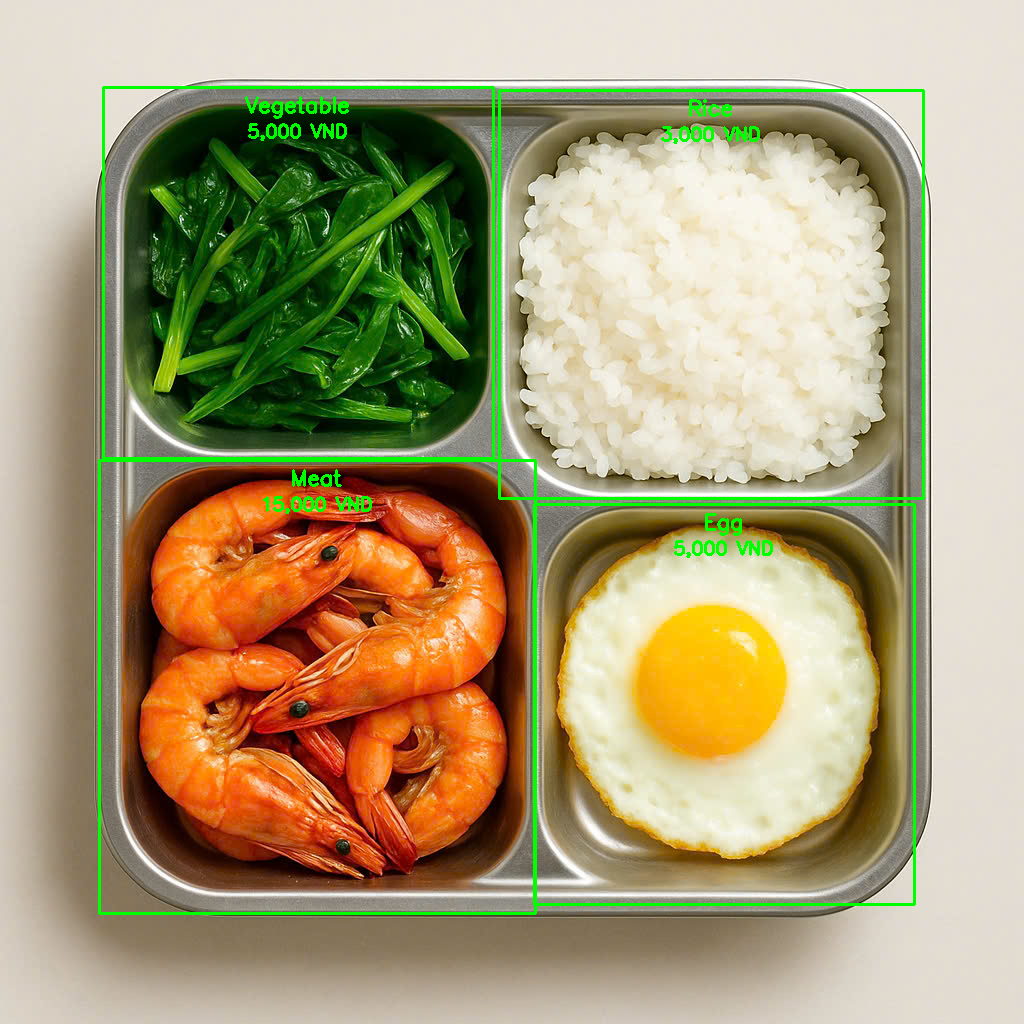

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
IMG_PATH = "/content/khay5.jpg"
YOLO_MODEL_PATH = "/content/yolov8x.pt"
CLF_MODEL_PATH = "/content/model.h5"
yolo_model = YOLO(YOLO_MODEL_PATH)
clf_model = load_model(CLF_MODEL_PATH)
dishes_classes = ['Chicken', 'Egg', 'Fish', 'Fruit', 'Meat', 'Rice', 'Shrimp', 'Soup', 'Soya-cake', 'Vegetable']
PRICE_TABLE = {
    'Rice': 3000,
    'Chicken': 15000,
    'Fish': 15000,
    'Egg': 5000,
    'Meat': 15000,
    'Shrimp': 15000,
    'Soup': 5000,
    'Vegetable': 5000,
    'Fruit': 5000,
    'Soya-cake': 3000
}
def classify_crop(img_crop):
    if img_crop is None or img_crop.shape[0] == 0 or img_crop.shape[1] == 0:
        return "Unknown", 0.0
    try:
        img = cv2.resize(img_crop, (64, 64))
        img = img.astype('float32') / 255.0
        x = img.reshape(1, 64, 64, 3)
        preds = clf_model.predict(x, verbose=0)
        idx = np.argmax(preds)
        conf = float(np.max(preds))
        return dishes_classes[idx], conf
    except:
        return "Error", 0.0
img = cv2.imread(IMG_PATH)
if img is None:
    print("Không đọc được ảnh.")
else:
    img_draw = img.copy()
    total_price = 0

    results = yolo_model(img)[0]
    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        crop = img[y1:y2, x1:x2]
        label, conf = classify_crop(crop)
        price = PRICE_TABLE.get(label, 0)
        if label not in ["Unknown", "Error"] and conf >= 0.5:
            total_price += price
            color = (0, 255, 0)
        else:
            color = (0, 0, 255)
        cv2.rectangle(img_draw, (x1, y1), (x2, y2), color, 2)
        if label != "Unknown":
            text_label = f"{label}"
            text_price = f"{price:,} VND"
            label_size = cv2.getTextSize(text_label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)[0]
            price_size = cv2.getTextSize(text_price, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)[0]

            label_x = x1 + (x2 - x1 - label_size[0]) // 2
            price_x = x1 + (x2 - x1 - price_size[0]) // 2
            text_y = y1 + 25
            price_y = text_y + 25
            cv2.putText(img_draw, text_label, (label_x, text_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
            cv2.putText(img_draw, text_price, (price_x, price_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    print(f"🧾 Tổng tiền: {total_price:,} VND")
    cv2_imshow(img_draw)


0: 640x640 4 bowls, 2 bananas, 1 apple, 1 dining table, 5593.2ms
Speed: 5.9ms preprocess, 5593.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
🧾 Tổng tiền: 58,000 VND


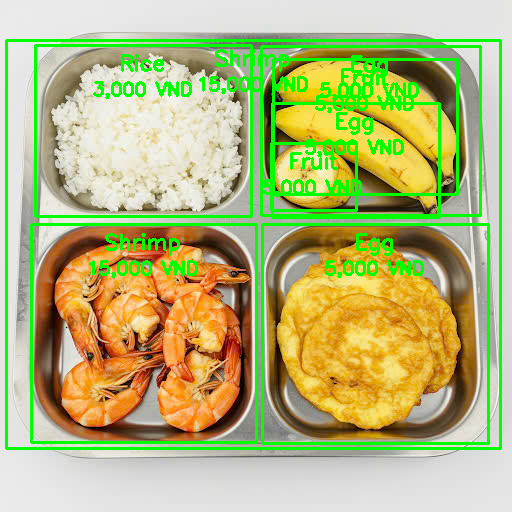

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
IMG_PATH = "/content/khay6.jpg"
YOLO_MODEL_PATH = "/content/yolov8x.pt"
CLF_MODEL_PATH = "/content/model.h5"
yolo_model = YOLO(YOLO_MODEL_PATH)
clf_model = load_model(CLF_MODEL_PATH)
dishes_classes = ['Chicken', 'Egg', 'Fish', 'Fruit', 'Meat', 'Rice', 'Shrimp', 'Soup', 'Soya-cake', 'Vegetable']
PRICE_TABLE = {
    'Rice': 3000,
    'Chicken': 15000,
    'Fish': 15000,
    'Egg': 5000,
    'Meat': 15000,
    'Shrimp': 15000,
    'Soup': 5000,
    'Vegetable': 5000,
    'Fruit': 5000,
    'Soya-cake': 3000
}
def classify_crop(img_crop):
    if img_crop is None or img_crop.shape[0] == 0 or img_crop.shape[1] == 0:
        return "Unknown", 0.0
    try:
        img = cv2.resize(img_crop, (64, 64))
        img = img.astype('float32') / 255.0
        x = img.reshape(1, 64, 64, 3)
        preds = clf_model.predict(x, verbose=0)
        idx = np.argmax(preds)
        conf = float(np.max(preds))
        return dishes_classes[idx], conf
    except:
        return "Error", 0.0
img = cv2.imread(IMG_PATH)
if img is None:
    print("Không đọc được ảnh.")
else:
    img_draw = img.copy()
    total_price = 0

    results = yolo_model(img)[0]
    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        crop = img[y1:y2, x1:x2]
        label, conf = classify_crop(crop)
        price = PRICE_TABLE.get(label, 0)
        if label not in ["Unknown", "Error"] and conf >= 0.5:
            total_price += price
            color = (0, 255, 0)
        else:
            color = (0, 0, 255)
        cv2.rectangle(img_draw, (x1, y1), (x2, y2), color, 2)
        if label != "Unknown":
            text_label = f"{label}"
            text_price = f"{price:,} VND"
            label_size = cv2.getTextSize(text_label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)[0]
            price_size = cv2.getTextSize(text_price, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)[0]

            label_x = x1 + (x2 - x1 - label_size[0]) // 2
            price_x = x1 + (x2 - x1 - price_size[0]) // 2
            text_y = y1 + 25
            price_y = text_y + 25
            cv2.putText(img_draw, text_label, (label_x, text_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
            cv2.putText(img_draw, text_price, (price_x, price_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    print(f"🧾 Tổng tiền: {total_price:,} VND")
    cv2_imshow(img_draw)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ppduyn/bottle")

print("Path to dataset files:", path)

100%|██████████| 1.47M/1.47M [00:00<00:00, 99.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ppduyn/bottle/versions/1


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import kagglehub

image_size = 64
dishes_classes = ['k nap','mat nhan','mop meo']

data, labels = [], []

for i, dishes in enumerate(dishes_classes):
    folder = os.path.join(path, 'water bottle','NG', dishes)
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            img = img / 255.0
            data.append(img)
            labels.append(i)
        except:
            continue

data = np.array(data)
labels = to_categorical(labels, num_classes=len(dishes_classes))

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(528, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(dishes_classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, batch_size=10, validation_data=(X_test, y_test))

model.save('model.h5')

Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 210ms/step - accuracy: 0.2040 - loss: 1.5030 - val_accuracy: 0.4545 - val_loss: 1.0764
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.3460 - loss: 1.2138 - val_accuracy: 0.4545 - val_loss: 1.0711
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step - accuracy: 0.5167 - loss: 1.1038 - val_accuracy: 0.4545 - val_loss: 1.0774
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.5778 - loss: 1.0364 - val_accuracy: 0.4545 - val_loss: 1.1179
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.4944 - loss: 1.0570 - val_accuracy: 0.4545 - val_loss: 1.1322
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.5149 - loss: 1.0319 - val_accuracy: 0.4545 - val_loss: 1.1300
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.5333 - loss: 0.9768 - val_accuracy: 0.4545 - val_loss: 1.1036
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.4587 - loss: 0.9685 - val_accuracy: 0.4545 - val_loss:


0: 512x640 3 bottles, 3586.6ms
Speed: 4.9ms preprocess, 3586.6ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 640)


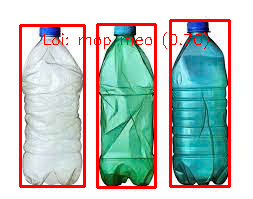

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

IMG_PATH = "/content/chai1.jpg"
YOLO_MODEL_PATH = "/content/yolov8x.pt"
DEFECT_MODEL_PATH = "/content/model.h5"

yolo_model = YOLO(YOLO_MODEL_PATH)
defect_model = load_model(DEFECT_MODEL_PATH)

defect_classes = ['k nap', 'mat nhan', 'mop meo']

def check_defect(img_crop):
    try:
        img = cv2.resize(img_crop, (64, 64))
        img = img.astype('float32') / 255.0
        x = img.reshape(1, 64, 64, 3)
        preds = defect_model.predict(x, verbose=0)
        idx = np.argmax(preds)
        conf = float(np.max(preds))
        return defect_classes[idx], conf
    except:
        return "Error", 0.0

img = cv2.imread(IMG_PATH)
if img is None:
    print("Không đọc được ảnh.")
else:
    img_draw = img.copy()
    results = yolo_model(img)[0]
    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        crop = img[y1:y2, x1:x2]
        label, conf = check_defect(crop)
        if label in defect_classes and conf >= 0.6:
            result_text = f"Loi: {label} ({conf:.2f})"
            color = (0, 0, 255)
        else:
            result_text = " Đạt yêu cầu"
            color = (0, 255, 0)
        cv2.rectangle(img_draw, (x1, y1), (x2, y2), color, 2)
        text_size = cv2.getTextSize(result_text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)[0]
        text_x = x1 + (x2 - x1 - text_size[0]) // 2
        text_y = y1 + 20
    cv2.putText(img_draw, result_text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
    cv2_imshow(img_draw)


0: 640x416 2 bottles, 4114.9ms
Speed: 4.6ms preprocess, 4114.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 416)


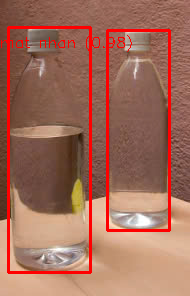

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

IMG_PATH = "/content/chai15.jpg"
YOLO_MODEL_PATH = "/content/yolov8x.pt"
DEFECT_MODEL_PATH = "/content/model.h5"

yolo_model = YOLO(YOLO_MODEL_PATH)
defect_model = load_model(DEFECT_MODEL_PATH)

defect_classes = ['k nap', 'mat nhan', 'mop meo']

def check_defect(img_crop):
    try:
        img = cv2.resize(img_crop, (64, 64))
        img = img.astype('float32') / 255.0
        x = img.reshape(1, 64, 64, 3)
        preds = defect_model.predict(x, verbose=0)
        idx = np.argmax(preds)
        conf = float(np.max(preds))
        return defect_classes[idx], conf
    except:
        return "Error", 0.0

img = cv2.imread(IMG_PATH)
if img is None:
    print("Không đọc được ảnh.")
else:
    img_draw = img.copy()
    results = yolo_model(img)[0]
    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        crop = img[y1:y2, x1:x2]
        label, conf = check_defect(crop)
        if label in defect_classes and conf >= 0.6:
            result_text = f"Loi: {label} ({conf:.2f})"
            color = (0, 0, 255)
        else:
            result_text = "GOOD"
            color = (0, 255, 0)
        cv2.rectangle(img_draw, (x1, y1), (x2, y2), color, 2)
        text_size = cv2.getTextSize(result_text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)[0]
        text_x = x1 + (x2 - x1 - text_size[0]) // 2
        text_y = y1 + 20
    cv2.putText(img_draw, result_text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
    cv2_imshow(img_draw)


0: 640x640 13 bottles, 4484.5ms
Speed: 5.0ms preprocess, 4484.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


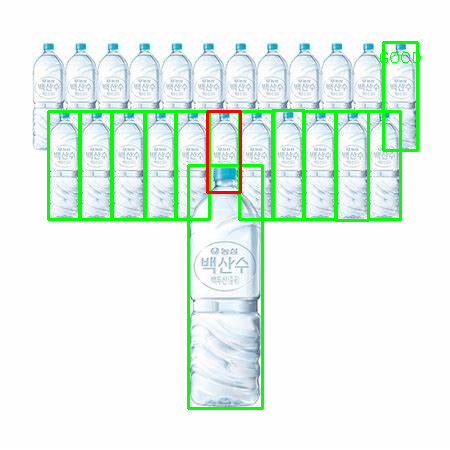

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

IMG_PATH = "/content/chai9.jpg"
YOLO_MODEL_PATH = "/content/yolov8x.pt"
DEFECT_MODEL_PATH = "/content/model.h5"

yolo_model = YOLO(YOLO_MODEL_PATH)
defect_model = load_model(DEFECT_MODEL_PATH)

defect_classes = ['k nap', 'mat nhan', 'mop meo']

def check_defect(img_crop):
    try:
        img = cv2.resize(img_crop, (64, 64))
        img = img.astype('float32') / 255.0
        x = img.reshape(1, 64, 64, 3)
        preds = defect_model.predict(x, verbose=0)
        idx = np.argmax(preds)
        conf = float(np.max(preds))
        return defect_classes[idx], conf
    except:
        return "Error", 0.0

img = cv2.imread(IMG_PATH)
if img is None:
    print("Không đọc được ảnh.")
else:
    img_draw = img.copy()
    results = yolo_model(img)[0]
    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        crop = img[y1:y2, x1:x2]
        label, conf = check_defect(crop)
        if label in defect_classes and conf >= 0.6:
            result_text = f"Loi: {label} ({conf:.2f})"
            color = (0, 0, 255)
        else:
            result_text = "GOOD"
            color = (0, 255, 0)
        cv2.rectangle(img_draw, (x1, y1), (x2, y2), color, 2)
        text_size = cv2.getTextSize(result_text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)[0]
        text_x = x1 + (x2 - x1 - text_size[0]) // 2
        text_y = y1 + 20
    cv2.putText(img_draw, result_text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
    cv2_imshow(img_draw)

In [29]:
import random

products = {
    "bút mực xanh": 10000,
    "bút mực đỏ": 10000,
    "bút mực đen": 10000,
    "bút chì kim": 20000,
    "bút chì": 5000,
    "gọt bút chì": 5000,
    "ngòi chì": 15000,
    "thước kẻ": 10000,
    "tẩy": 5000,
    "máy tính cầm tay": 300000,
    "kéo": 15000,
    "dao rọc giấy": 15000,
    "giấy a4 (1 ram)": 65000,
    "tập học sinh": 10000,
}

greetings = ["Chào bạn! Tôi có thể giúp gì cho bạn hôm nay?", "Xin chào! Cần giúp gì không?", "Chào bạn, tôi có thể hỗ trợ bạn như thế nào?"]
goodbyes = ["Tạm biệt! Hẹn gặp lại.", "Cảm ơn bạn đã ghé thăm, chúc bạn một ngày tốt lành!", "Tạm biệt, nếu cần gì cứ quay lại nhé!"]
help_message = "Bạn có thể hỏi tôi về các sản phẩm văn phòng phẩm như bút mực, bút chì, sách giáo khoa, thước kẻ, và nhiều hơn nữa."

def chatbot_response(user_input):
    user_input = user_input.lower()
    if "chào" in user_input or "hi" in user_input or "xin chào" in user_input:
        return random.choice(greetings)
    for product in products:
        if product in user_input:
            return f"Sản phẩm {product} có giá {products[product]} VND."
    if "có gì" in user_input or "sản phẩm" in user_input:
        return "Chúng tôi có rất nhiều sản phẩm: bút mực, bút chì, thước kẻ, máy tính cầm tay, sách giáo khoa... Bạn muốn tìm sản phẩm nào?"
    if "giá" in user_input:
        return "Vui lòng cung cấp tên sản phẩm bạn muốn biết giá."
        if product in user_input:
            return f"Sản phẩm {product} có giá {products[product]} VND."
    if "giúp" in user_input or "trợ giúp" in user_input:
        return help_message
    if "tạm biệt" in user_input or "bye" in user_input or "cảm ơn" in user_input:
        return random.choice(goodbyes)
    return "Xin lỗi, tôi không hiểu câu hỏi của bạn. Bạn có thể hỏi lại không?"
def chat():
    print("Chào bạn! Tôi là trợ lý ảo của cửa hàng văn phòng phẩm DVL. Bạn có thể hỏi về các sản phẩm hoặc giá cả.")

    while True:
        user_input = input("Bạn: ")
        if "tạm biệt" in user_input or "bye" in user_input or "cảm ơn" in user_input:
            print(f"Bot: {chatbot_response(user_input)}")
            break
        else:
            print(f"Bot: {chatbot_response(user_input)}")
chat()

Chào bạn! Tôi là trợ lý ảo của cửa hàng văn phòng phẩm DVL. Bạn có thể hỏi về các sản phẩm hoặc giá cả.
Bạn: tôi muốn mua thước kẻ
Bot: Sản phẩm thước kẻ có giá 10000 VND.
Bạn: còn bút mực xanh
Bot: Sản phẩm bút mực xanh có giá 10000 VND.
Bạn: cảm ơn nha
Bot: Tạm biệt! Hẹn gặp lại.
